In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def createCpxTestSignal(frequencies, amplitudes, delays, lengths, sampling_frequency, signal_length)->np.ndarray:
    assert(len(frequencies) == len(amplitudes) == len(delays) == len(lengths))
    tIdx = np.arange(0, signal_length, 1/sampling_frequency)
    signal = np.zeros(len(tIdx), dtype=np.complex64)
    for i in range(len(frequencies)):
        component = np.sin(2 * np.pi * frequencies[i] * (tIdx + delays[i])) + 1j * np.cos(2 * np.pi * frequencies[i] * (tIdx + delays[i]))
        rectangle = (delays[0] < tIdx) & (tIdx < (delays[0] + lengths[0]))
        signal += amplitudes[i] * component * rectangle
    return signal, tIdx

In [13]:
frequencies = [1e4]
amplitudes = [0.5]
delays = [3e-8]
lengths = [40e-3]
sampling_frequency = 2e6
signal_length = 0.05

testSignal, t = createCpxTestSignal(frequencies, amplitudes, delays, lengths, sampling_frequency, signal_length)

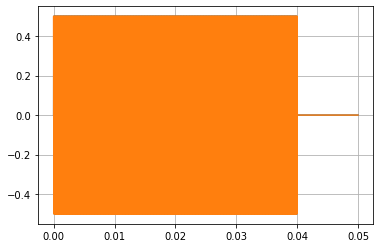

In [14]:
plt.plot(t, np.real(testSignal))
plt.plot(t, np.imag(testSignal))
plt.grid()